In [1]:
import os
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('/Users/yinchiahuang/Library/Mobile Documents/com~apple~CloudDocs/CS677/Assignments/yinchia@bu.edu_hw1/HMC_Honda Motor Co., Ltd.csv')

In [3]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013/9/16,38.830002,38.990002,38.669998,38.830002,34.026104,440200
1,2013/9/17,38.490002,38.799999,38.360001,38.669998,33.885891,442700
2,2013/9/18,38.720001,39.860001,38.720001,39.799999,34.876091,742500
3,2013/9/19,39.770000,39.830002,39.529999,39.590000,34.692081,353300
4,2013/9/20,39.200001,39.340000,38.830002,38.900002,34.087433,877400
5,2013/9/23,39.029999,39.040001,38.700001,38.919998,34.104969,201000
6,2013/9/24,38.990002,39.240002,38.820000,38.959999,34.140015,224200
7,2013/9/25,38.869999,38.900002,38.549999,38.759998,34.135738,169800
8,2013/9/26,39.070000,39.270000,38.889999,39.189999,34.514431,196300
9,2013/9/27,38.689999,38.779999,38.599998,38.720001,34.100506,148300


### Generate a “label” data set. We will use such data sets for classification and prediction. Take window=5 days and for each day compute rolling moving average (call this x) and rolling standard deviation (call this y). For each such day, we compute the vector (x, y, label) as follows:
##### a. this day is assigned (x, y, +) if next day return is positive (or zero)
#### b. this day is assigned (x, y, -) if next day return is negative

In [4]:
win=5

new_df = df.copy()
new_df.rename(columns={'Adj Close': 'Price'}, inplace = True) 
new_df = new_df[['Date', 'Price']]
new_df['pct_change'] = new_df['Price'].pct_change() 
new_df['pct_change_size'] = abs(new_df['pct_change'])
new_df['pct_change_win'] = new_df['Price'].pct_change(win) 
new_df['std'] = new_df['pct_change'].rolling(win).std() 
new_df['pct_tomorrow'] = new_df['pct_change'].shift(1) 
new_df['label'] = new_df['pct_tomorrow'] > 0

In [5]:
new_df

,Date,Price,pct_change,pct_change_size,pct_change_win,std,pct_tomorrow,label
0,2013/9/16,34.026104,NaN,NaN,NaN,NaN,NaN,False
1,2013/9/17,33.885891,-0.004121,0.004121,NaN,NaN,NaN,False
2,2013/9/18,34.876091,0.029222,0.029222,NaN,NaN,-0.004121,False
3,2013/9/19,34.692081,-0.005276,0.005276,NaN,NaN,0.029222,True
4,2013/9/20,34.087433,-0.017429,0.017429,NaN,NaN,-0.005276,False
5,2013/9/23,34.104969,0.000514,0.000514,0.002318,0.017328,-0.017429,False
6,2013/9/24,34.140015,0.001028,0.001028,0.007499,0.017131,0.000514,True
7,2013/9/25,34.135738,-0.000125,0.000125,-0.021228,0.007783,0.001028,True
8,2013/9/26,34.514431,0.011094,0.011094,-0.005121,0.010288,-0.000125,False
9,2013/9/27,34.100506,-0.011993,0.011993,0.000384,0.008188,0.011094,True


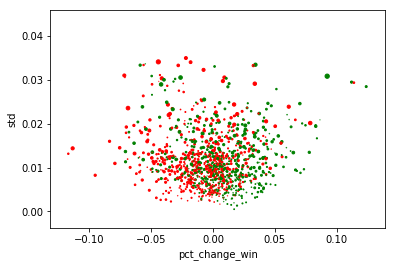

In [7]:
import matplotlib.pyplot as plt
import pandas as pd

colors = np.where(new_df['label'] == True , 'g', 'r')
# plotting
new_df.plot(kind='scatter', x='pct_change_win', y='std',c=colors, s=new_df['pct_change_size']*250 )
plt.show()